# Project: Regression Modeling with the Boston Housing Dataset

## Introduction

In this final lab, you'll apply the regression analysis and diagnostics techniques covered in this section to the famous "Boston Housing" dataset. You performed a detailed EDA for this dataset earlier on, and hopefully, you more or less recall how this data is structured! In this lab, you'll use some of the features in this dataset to create a linear model to predict the house price!

## Objectives
You will be able to:
* Build many linear models with the Boston housing data using OLS
* Analyze OLS diagnostics for model validity 
* Visually explain the results and interpret the diagnostics from Statsmodels 
* Comment on the goodness of fit for a simple regression model

## Let's get started

### Import necessary libraries and load 'BostonHousing.csv' as a pandas dataframe

In [79]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
import numpy as np
%matplotlib inline

bostonhousing_df = pd.read_csv('BostonHousing.csv')
bostonhousing_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The columns in the Boston housing data represent the dependent and independent variables. The dependent variable here is the median house value `MEDV`. The description of the other variables is available on [KAGGLE](https://www.kaggle.com/c/boston-housing). 

### Inspect the columns of the dataset and comment on type of variables present

In [40]:
# Your code here
bostonhousing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


#### Record your observations here 
1. no missing values
2. All integers or float types
3. some integers may be categorical codes.

### Create histograms for all variables in the dataset and comment on their shape (uniform or not?)

<function matplotlib.pyplot.show(*args, **kw)>

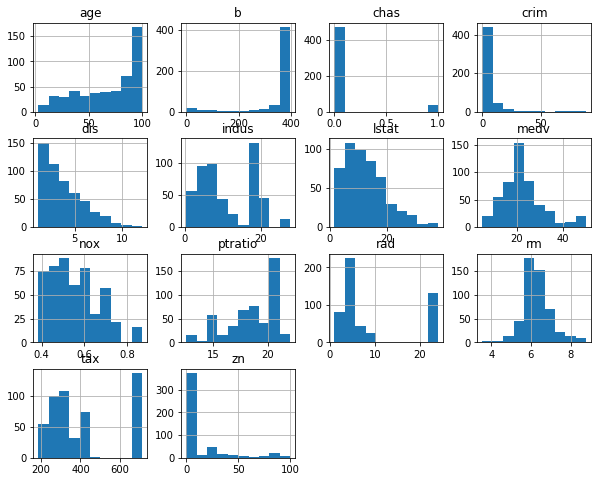

In [41]:
# Your code here 
bostonhousing_df.hist(figsize=(10,8))
plt.show

#### You observations here 
Hardly any variable has a normal distribution except for perhaps Rooms and the dependent variable medv. Though both seem to have a tail on the upper ends. (?? negatively skewed?)

Based on this, we preselected some features  for you which appear to be more 'normal' than others.
### Create a new dataset with `['crim', 'dis', 'rm', 'zn', 'age', 'medv']`

In [42]:
# Your code here
bostonhousing_df_subset = bostonhousing_df[['crim', 'dis', 'rm', 'age', 'medv']]
bostonhousing_df_subset.head()

,crim,dis,rm,age,medv
0,0.00632,4.0900,6.575,65.2,24.0
1,0.02731,4.9671,6.421,78.9,21.6
2,0.02729,4.9671,7.185,61.1,34.7
3,0.03237,6.0622,6.998,45.8,33.4
4,0.06905,6.0622,7.147,54.2,36.2


### Check for linearity assumption for all chosen features with target variable using scatter plots

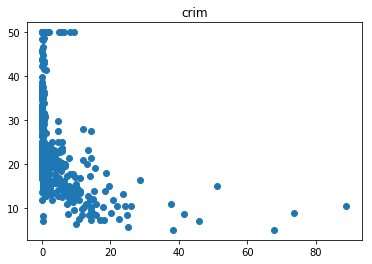

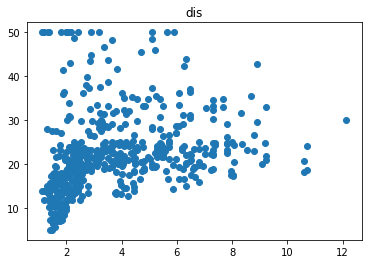

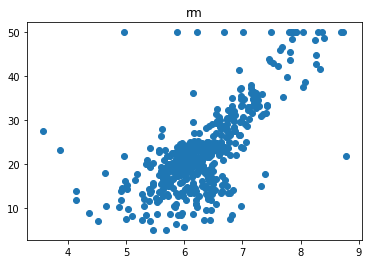

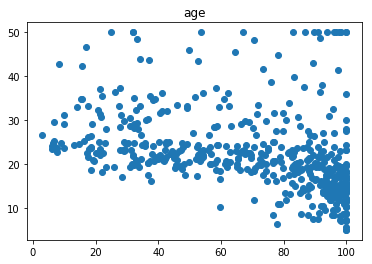

In [43]:
# Your code here 
for column in ['crim', 'dis', 'rm', 'age']:
    fig = plt.figure()
    plt.scatter(bostonhousing_df_subset[column], bostonhousing_df_subset['medv'])
    plt.title(column)
    plt.show

#### Your observations here 
Data is fairly spread out though you can see some associations, but particularly with rooms. I wouldn't make any decisions here about the data since it's very difficult to tell if there's no relationship, or skew.

Clearly, your data needs a lot of preprocessing to improve the results. This key behind a Kaggle competition is to process the data in such a way that you can identify the relationships and make predictions in the best possible way. For now, we'll the dataset untouched and just move on with the regression. The assumptions are _exactly_ all fulfilled, but they still hold to a level that we can move on. 

### Let's do Regression 

Now, let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). You'll do this in a loop and in every iteration, you should pick one of the independent variables. Perform the following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot a regression line on the scatter plots
* Plot the residuals using `sm.graphics.plot_regress_exog()`
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

In [90]:
def variable_model_stats(variable):
    f = 'medv~' + variable
    print("Results for {} dependent variable".format(variable))
    model = ols(formula=f, data=bostonhousing_df_subset[[variable,'medv']]).fit()
    min_max_df = pd.DataFrame(data={variable: [bostonhousing_df_subset[variable].min(), 
                                               bostonhousing_df_subset[variable].max()]})
    min_max_df['Prediction'] = model.predict(min_max_df)
    print(min_max_df)
    fig = plt.figure()
    plt.scatter(bostonhousing_df_subset[variable], bostonhousing_df_subset['medv'])
    plt.plot(min_max_df[variable], min_max_df['Prediction'], c='red')
    plt.show()  
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, variable, fig=fig)
    plt.show()
    residuals = model.resid
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
    plt.show()
    return np.array([variable, model.rsquared, model.params[0],
                     model.params[1], model.pvalues[1], sm.stats.jarque_bera(model.resid)[0]])

Results for crim dependent variable
       crim  Prediction
0   0.00632   24.030482
1  88.97620  -12.908947


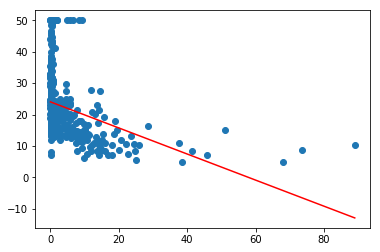

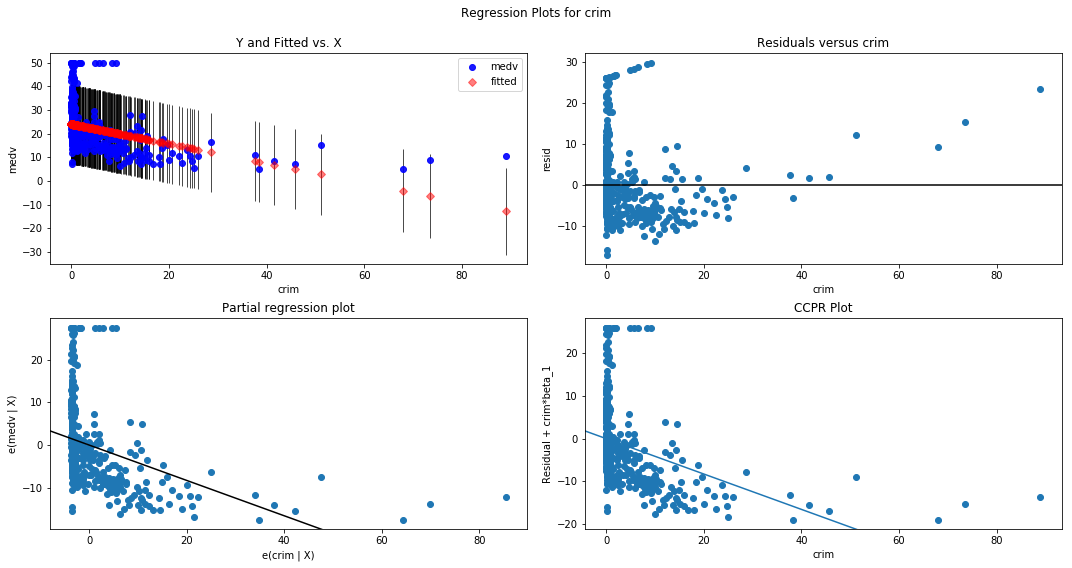

<Figure size 1080x576 with 0 Axes>

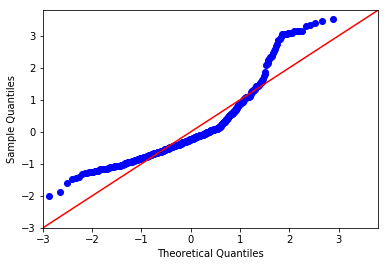

['crim' '0.15078046904975717' '24.033106174123876' '-0.4151902779150912'
 '1.1739870821942348e-19' '295.40371976845904']
Press Enter to continue...
Results for dis dependent variable
       dis  Prediction
0   1.1296   19.623174
1  12.1265   31.627534


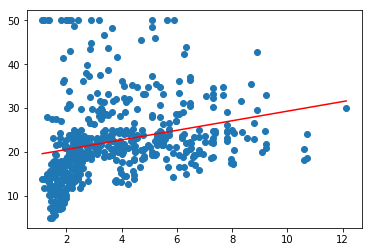

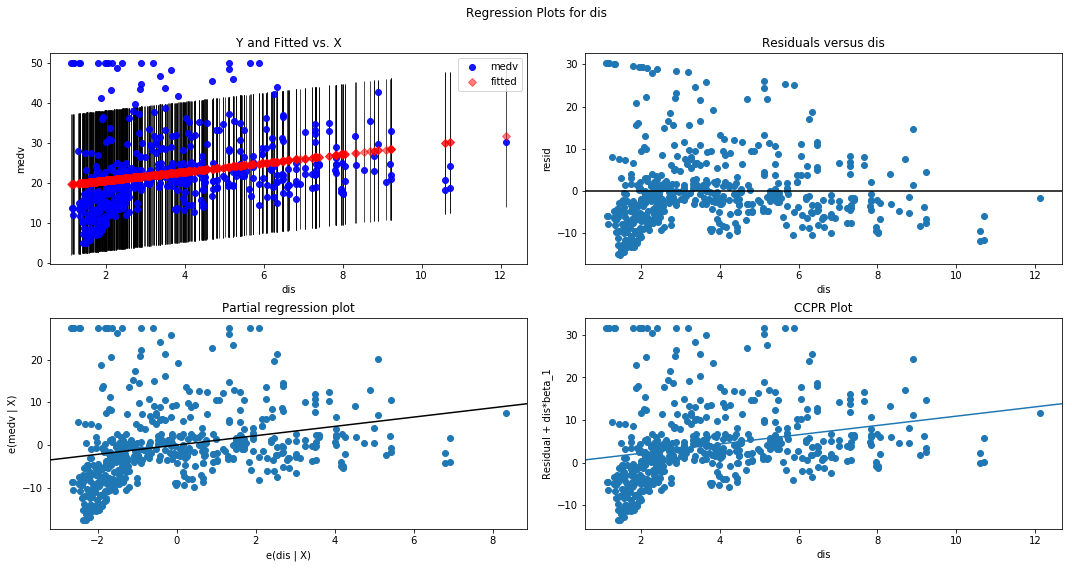

<Figure size 1080x576 with 0 Axes>

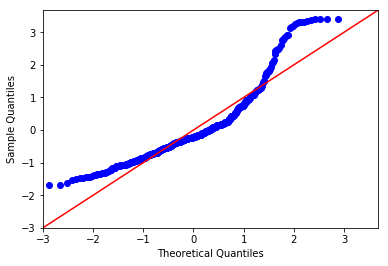

['dis' '0.062464372121782796' '18.39008833049339' '1.091613015841109'
 '1.2066117273371135e-08' '305.10416474827383']
Press Enter to continue...
Results for rm dependent variable
      rm  Prediction
0  3.561   -2.258011
1  8.780   45.245896


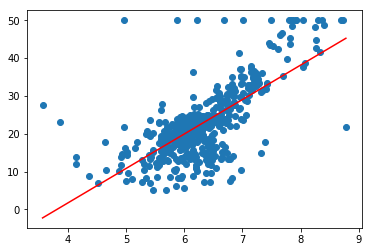

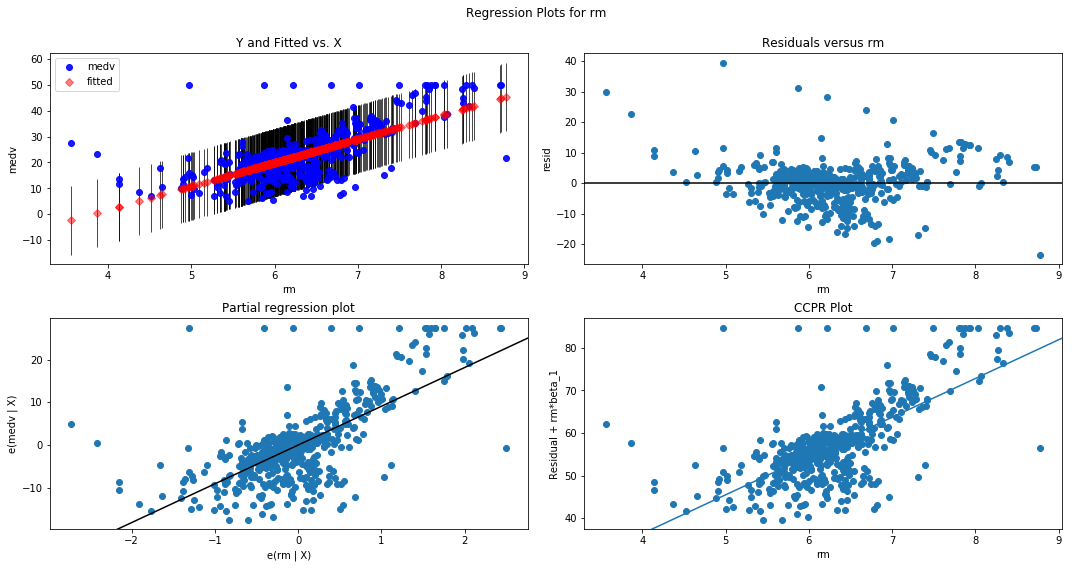

<Figure size 1080x576 with 0 Axes>

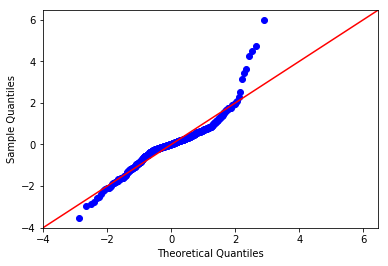

['rm' '0.4835254559913341' '-34.67062077643858' '9.102108981180312'
 '2.4872288710076683e-74' '612.4489850641658']
Press Enter to continue...
Results for age dependent variable
     age  Prediction
0    2.9   30.621506
1  100.0   18.662406


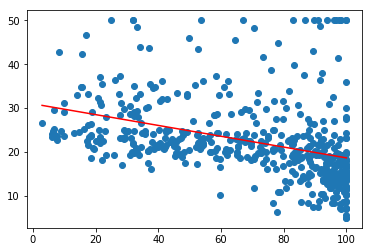

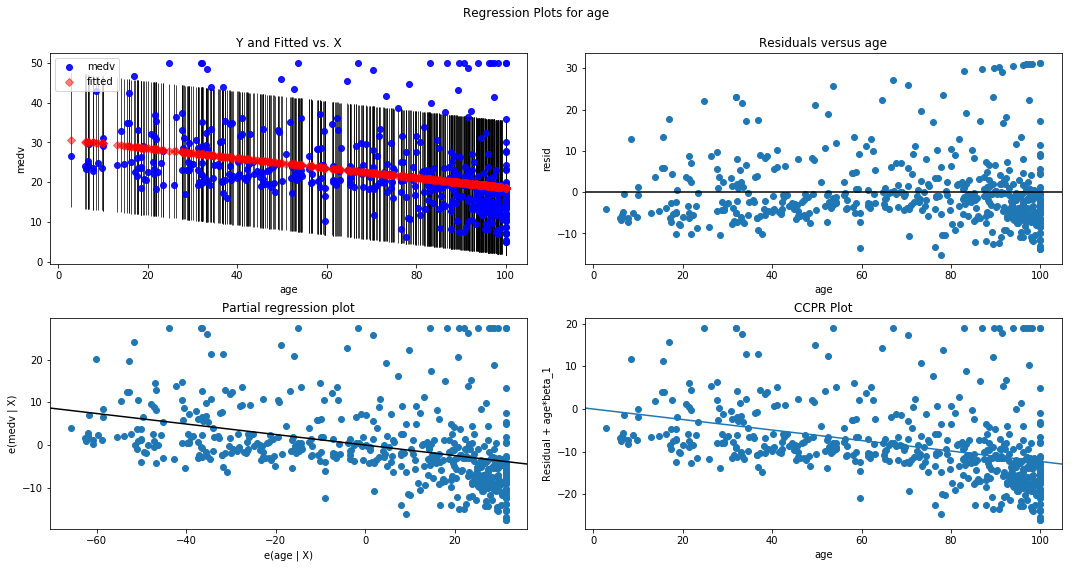

<Figure size 1080x576 with 0 Axes>

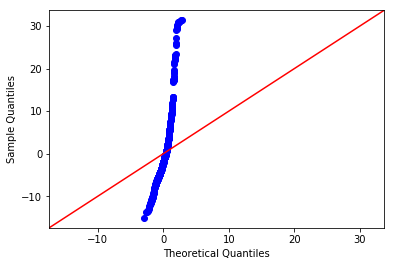

['age' '0.14209474407780465' '30.978677762618037' '-0.12316272123567971'
 '1.5699822091881113e-18' '456.9834336489886']
Press Enter to continue...


In [93]:
models = []
for dependent_variable in ['crim', 'dis', 'rm', 'age']:
    model_values = variable_model_stats(dependent_variable)
    models.append(model_values)
    print(model_values)
    input("Press Enter to continue...")

In [96]:
pd.DataFrame(models, columns=['variable', 'rsquared', 'intercept', 'slope', 'p-value', 'JB normality' ])

,variable,rsquared,intercept,slope,p-value,JB normality
0,crim,0.15078046904975717,24.033106174123876,-0.4151902779150912,1.1739870821942348e-19,295.40371976845904
1,dis,0.062464372121782796,18.39008833049339,1.091613015841109,1.2066117273371135e-08,305.10416474827383
2,rm,0.4835254559913341,-34.67062077643858,9.102108981180312,2.4872288710076683e-74,612.4489850641658
3,age,0.14209474407780465,30.978677762618037,-0.12316272123567971,1.5699822091881113e-18,456.9834336489886


#### Your observations here 
1. None of these have a JB normality close to 1, and p values well below .05 so we can reject null hypothesis of assuming a normal idstribution.
2. rsquared - none are close to 1, the highest one is rooms, but even then below 0.5

Clearly, the results are not very reliable. The best R-Squared is witnessed with `rm`, so in this analysis, this is uour best predictor. 

### How can you improve these results?
1. Preprocessing 

This is where preprocessing of data comes in. Dealing with outliers, normalizing data, scaling values etc. can help regression analysis get more meaningful results from the given data. 

2. Advanced Analytical Methods

Simple regression is a very basic analysis technique and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. Later on, you'll explore at multiple regression where you can use multiple features **at once** to define a relationship with the outcome. You'll also look at some preprocessing and data simplification techniques and revisit the Boston dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in the previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the goodness of fit. 

![](images/joke.png)

## Summary 

In this lab, you applied your skills learned so far on a new data set. You looked at the outcome of your analysis and realized that the data might need some preprocessing to see a clear improvement in results. You'll pick this back up later on, after learning about more preprocessing techniques and advanced modeling techniques.